Project: Customer Churn Prediction & Analysis
Objective: Analyze customer behavior, identify churn patterns, and build a predictive model to help businesses retain customers.
 Project Overview
Customer churn refers to when a customer stops doing business with a company. This is a critical issue for businesses, especially those in telecom, banking, SaaS, and subscription-based services. The goal of this project is to analyze customer behavior and build a machine learning model to predict churn.

By identifying factors that influence customer retention, businesses can take proactive measures to reduce churn and increase customer loyalty.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("C:/Users/ADMIN/Downloads/customer_churn_dataset.csv")  # Replace with actual file path
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Male,0,No,No,50,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,No,Month-to-month,Yes,Bank transfer (automatic),39.08,4345.15,No
1,CUST0002,Female,0,No,Yes,46,Yes,Yes,Fiber optic,No,...,No internet service,Yes,No,No internet service,Two year,No,Bank transfer (automatic),108.30,4324.78,Yes
2,CUST0003,Male,0,No,Yes,3,Yes,No phone service,DSL,No,...,No internet service,Yes,No,No internet service,One year,No,Electronic check,90.80,3472.51,No
3,CUST0004,Male,0,No,Yes,6,Yes,Yes,No,No internet service,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),106.85,3132.08,No
4,CUST0005,Male,0,Yes,No,34,Yes,No,Fiber optic,Yes,...,No,Yes,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),58.35,93.32,No


In [5]:
# Drop customer ID as it's not useful
df.drop(columns=['customerID'], inplace=True, errors='ignore')

# Convert categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Handle missing values
df.fillna(df.median(), inplace=True)

# Normalize numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])


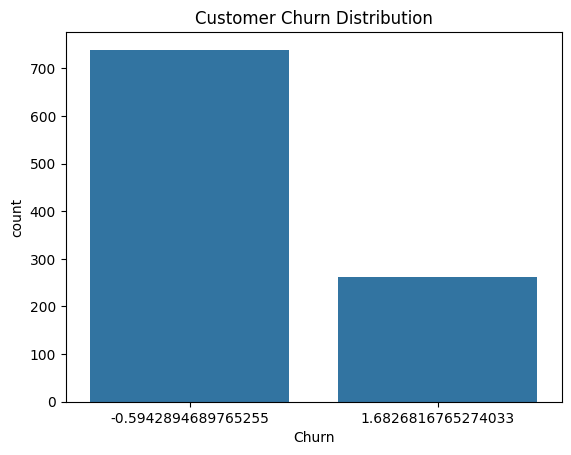

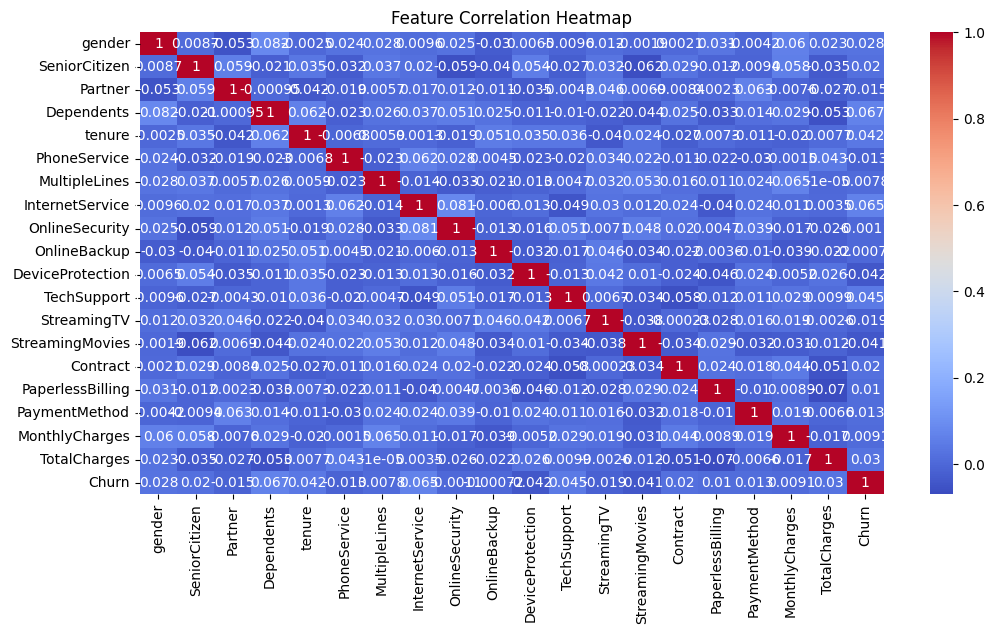

In [7]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Churn' column to numerical (0 = No, 1 = Yes)
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])




In [15]:
print(df['Churn'].dtype)  # Should print 'int' or 'category' not 'float'
print(df['Churn'].unique())  # Should print [0, 1]


int64
[0 1]


In [17]:
# Split data
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.755
Confusion Matrix:
 [[151   1]
 [ 48   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       152
           1       0.00      0.00      0.00        48

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.58      0.76      0.65       200

